In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Matplotlib is building the font cache using fc-list. This may take a moment.


In [4]:
df_1 = pd.read_csv('Dataset/statewise_tested_numbers_data.csv')
df_2 = pd.read_csv('Dataset/state_wise_daily.csv')
df_2

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,18-Jun-20,Recovered,10741,2,131,1,206,185,0,103,...,32,275,1,1017,230,83,399,132,468,0
290,18-Jun-20,Deceased,343,0,2,0,1,5,0,0,...,5,17,0,49,3,0,23,0,12,0
291,19-Jun-20,Confirmed,14638,2,465,32,0,250,7,72,...,217,299,0,2115,499,27,809,74,355,224
292,19-Jun-20,Recovered,9029,0,133,3,218,137,9,103,...,66,255,16,1630,51,18,357,47,302,0


In [7]:
df = df_1[['State','Updated On','Total Tested','Positive','Population NCP 2019 Projection']]
#df = df.groupby('Updated On').sum()
df['% Positive'] = (df['Positive']/df['Total Tested'])*100
df['Updated On'] = pd.to_datetime(df['Updated On'], format = '%d/%m/%Y')
state = df.groupby('State').sum()
df[df.State.eq('Delhi')]

/home/amit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/amit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,Updated On,Total Tested,Positive,Population NCP 2019 Projection,% Positive
489,Delhi,2020-04-01,2621.0,NaN,19814000.0,NaN
490,Delhi,2020-04-07,9041.0,576.0,19814000.0,6.370977
491,Delhi,2020-04-09,9968.0,720.0,19814000.0,7.223114
492,Delhi,2020-04-10,11061.0,903.0,19814000.0,8.163819
493,Delhi,2020-04-11,11709.0,1069.0,19814000.0,9.129729
...,...,...,...,...,...,...
559,Delhi,2020-06-16,304483.0,44688.0,NaN,14.676681
560,Delhi,2020-06-17,312576.0,47102.0,NaN,15.068975
561,Delhi,2020-06-18,321302.0,49979.0,NaN,15.555147
562,Delhi,2020-06-19,334376.0,53116.0,NaN,15.885111


In [8]:
from datetime import datetime
delhi_data = df[df.State.eq('Delhi')]
delhi_date = pd.to_datetime(delhi_data['Updated On'])
delhi_test = delhi_data['Total Tested']
#delhi_test.fillna(method = 'ffill',inplace = True)
delhi_positive = delhi_data['Positive']
rate = delhi_data['% Positive']
date = pd.date_range(start = '04-07-2020', end ='06-20-2020')

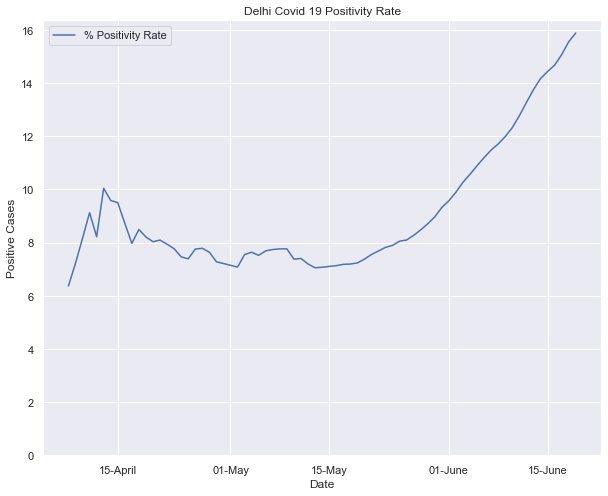

In [15]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(date, rate)
plt.title('Delhi Covid 19 Positivity Rate')
plt.legend(['% Positivity Rate'])
plt.xlabel("Date")
plt.ylabel('Positive Cases')
ax.set_ylim(ymin = 0)
ax.set_xticklabels(['15-April','01-May','15-May','01-June','15-June'])
plt.savefig('delhi_covid_rate.png')
plt.show()

In [10]:
df_2

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,18-Jun-20,Recovered,10741,2,131,1,206,185,0,103,...,32,275,1,1017,230,83,399,132,468,0
290,18-Jun-20,Deceased,343,0,2,0,1,5,0,0,...,5,17,0,49,3,0,23,0,12,0
291,19-Jun-20,Confirmed,14638,2,465,32,0,250,7,72,...,217,299,0,2115,499,27,809,74,355,224
292,19-Jun-20,Recovered,9029,0,133,3,218,137,9,103,...,66,255,16,1630,51,18,357,47,302,0


In [32]:
data_2 = df_2[['Date','Status','DL']]
confirmed = data_2[data_2.Status.eq('Confirmed')]
deceased = data_2[data_2.Status.eq('Deceased')]
recovered = data_2[data_2.Status.eq('Recovered')]

date_2 = pd.date_range(start = '03-14-2020', end ='06-19-2020')

delhi = pd.DataFrame({'Date' : date_2.values, 'Confirmed' : confirmed['DL'].values, 'Deceased' : deceased['DL'].values, 'Recovered' : recovered['DL'].values})
delhi.set_index('Date', inplace = True)
delhi


,Confirmed,Deceased,Recovered
Date,,,
2020-03-14,7,1,1
2020-03-15,0,0,1
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,2,0,0
...,...,...,...
2020-06-15,1647,73,604
2020-06-16,1859,437,73
2020-06-17,2414,67,957


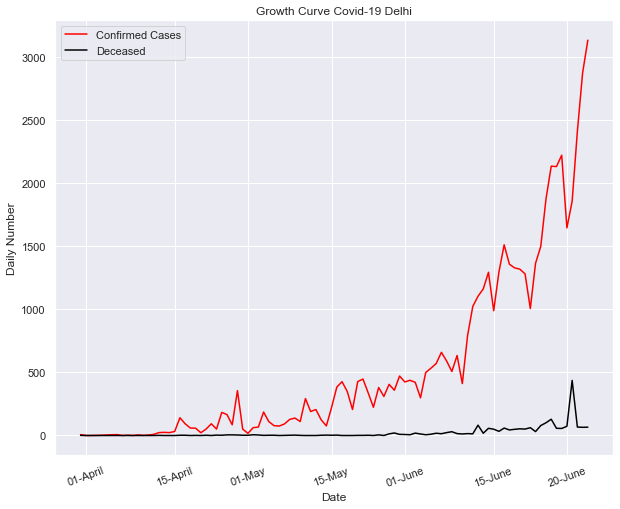

In [21]:
plt.figure(figsize = (10, 8))
ax_1 = sns.lineplot(delhi.index, delhi['Confirmed'], color = 'red')
sns.lineplot(delhi.index, delhi['Deceased'], color = 'black')
#sns.lineplot(date_2, recovered['DL'], color = 'blue')

plt.xlabel('Date')
plt.ylabel('Daily Number')
plt.legend(['Confirmed Cases','Deceased'])
plt.title('Growth Curve Covid-19 Delhi')
ax_1.set_xticklabels(['01-April','15-April','01-May','15-May','01-June','15-June','20-June'], rotation = 20)
plt.show()

In [17]:
plt.figure(figsize = (10, 8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>